In [1]:
%%capture
!pip install netcdf4
!pip install geopandas

In [2]:
import matplotlib.pyplot as plt
import xarray as xr
import pandas as pd
import numpy as np
import geopandas as gpd
import fiona
import matplotlib.colors as colors

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
#Abriendo los shapefiles
ruta_Sudamerica = "/content/drive/MyDrive/2022 II/4. Técnicas de programación 2/TPM_II/datos/shps/South_America.shp"
Sudamerica = gpd.read_file(ruta_Sudamerica) ## Sudamerica.crs (para saber coordenadas)
ruta_DEM = "/content/drive/MyDrive/2022 II/4. Técnicas de programación 2/TPM_II/datos/Spatial_co_variables/DEM.nc"
curvas = xr.open_dataset(ruta_DEM)
curvas = curvas.rename({'DEM':'Altitude'}) #rename al DEM
ruta_lago = "/content/drive/MyDrive/2022 II/4. Técnicas de programación 2/Tareas Huerta/lago_titicaca/lago_titicaca_sideteva_puno.shp"
lago_titicaca = gpd.read_file(ruta_lago)
lago_titicaca = lago_titicaca.to_crs("EPSG:4326")

In [5]:
#creando los puntos de estaciones
ruta_csv = "/content/drive/MyDrive/2022 II/4. Técnicas de programación 2/Tareas Huerta/Stations_trabajo.csv"
estaciones = pd.read_csv(ruta_csv,header=0, delimiter = ";")
schema = {
    'geometry':'Point',
    'properties':[('Nombre','str'),("Tipo","str"),("Analisis","str"),("FID","int")]
}
pointShp = fiona.open('/content/drive/MyDrive/2022 II/4. Técnicas de programación 2/Tareas Huerta/estaciones.shp', mode='w', driver='ESRI Shapefile',
          schema = schema, crs = "EPSG:4326") #fiona.open(ruta donde se va aguardar, ....)

for index, row in estaciones.iterrows():
    rowDict = {
        'geometry' : {'type':'Point',
                     'coordinates': (row.X,row.Y)},
        'properties': {"Nombre" : row.Name, "Tipo": row.Type,"Analisis":row.Analyses,"FID":row.Number},
    }
    pointShp.write(rowDict)
pointShp.close()

In [6]:
ruta_puntos = "/content/drive/MyDrive/2022 II/4. Técnicas de programación 2/Tareas Huerta/estaciones.shp"
estaciones_shape = gpd.read_file(ruta_puntos)

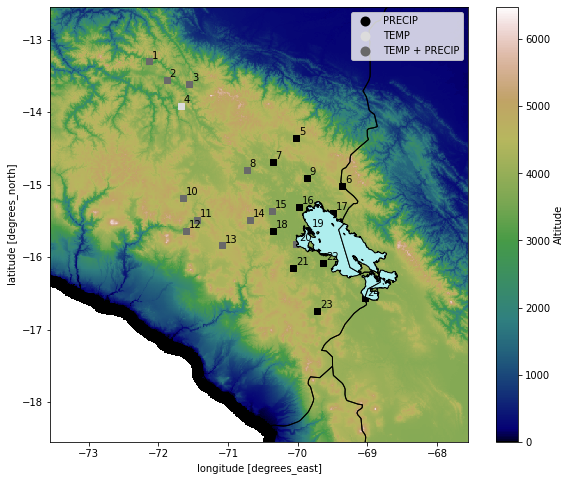

In [8]:
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
curvas.Altitude.plot(ax=ax,cmap="gist_earth")
lugar = Sudamerica.plot(ax=ax,facecolor="none",edgecolor="black")
color_dict = {"TEMP + PRECIP":"black", "TEMP":"gainsboro", "PRECIP":"dimgray"}
estaciones = estaciones_shape.plot(ax=ax,column="Tipo",legend=True, marker ="s",
                                   cmap=colors.ListedColormap(list(color_dict.values()))) #para darle distintos colores
lago_titicaca.plot(ax=ax,facecolor="paleturquoise",edgecolor="black")
minx, miny, maxx, maxy = -73.55, -18.55, -67.55, -12.55
ax.set_xlim(minx, maxx)
ax.set_ylim(miny, maxy)

for x, y, label in zip(estaciones_shape.geometry.x, estaciones_shape.geometry.y, estaciones_shape.FID):
    ax.annotate(label, xy=(x, y), xytext=(3, 3), textcoords="offset points")

fig.savefig("Figura1.png")